# Fuku Visualize

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
__________

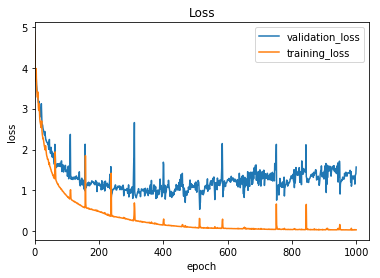

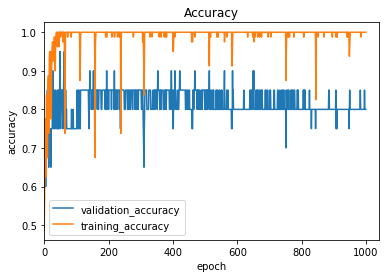

In [19]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
import pickle

import matplotlib.pyplot as plt

model = load_model('./model/Fuku_model_0.h5')
model.summary()
#model.load_weights('./model/MNIST_model_weights.h5')
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# save model architecture and parameter


with open('hist_0.pkl', mode='rb') as f:
    hist = pickle.load(f)
    print(type(hist))
    print(hist.keys())
    
    fig1 = plt.figure()
       
    plt.title("Loss")
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.xlim(0, 1040)
    plt.plot(hist['val_loss'], label="validation_loss")
    plt.plot(hist['loss'], label="training_loss")
    plt.legend()
    plt.show()

    fig2 = plt.figure()
           
    plt.title("Accuracy")
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.xlim(0, 1040)
    plt.plot(hist['val_acc'], label="validation_accuracy")
    plt.plot(hist['acc'], label="training_accuracy")
    plt.legend()
    plt.show()

    


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# config = model.layers[0].get_config()
# print(config)
W = model.layers[0].get_weights()[0]
# b = model.layers[0].get_weights()[1]
print(W.shape)
nb_filters = W.shape[3]
print(nb_filters)
# print(b.shape)

#print(W[:,:,:,0])
#im = W[:,:,:,0]
#im = np.reshape(im, (7,7))
#print(im.shape)
#scaler = MinMaxScaler(feature_range=(0,255))
#im = scaler.fit_transform(im)
# plt.subplot(4, 8, i+1)
# plt.axis('off')

# im = np.identity(7)

#plt.imshow(im, cmap='gray')
#plt.show()

# print(W)

# if K.image_data_format() == 'channels_first':
#     W = W.transpose(3,2,0,1)
# nb_filters, nb_channels, nb_row, nb_col = W.shape

# print(W[0, 0])

# print(W.size)

#plt.figure()
#plt.imshow(im, cmap='gray')


for i in range(nb_filters):
    im = W[:, :, :, i]    
    im = np.reshape(im, (7, 7))
    scaler = MinMaxScaler(feature_range=(0,255))
    im = scaler.fit_transform(im)
    plt.subplot(4, 8, i+1)
    plt.axis('off')
    plt.imshow(im, cmap='gray')
plt.show()


#def visualize_filter(model):
#    W = model.layers[0].get_weights()[0]
#    if K.image_data_format() == 'channels_first':


(3, 3, 3, 32)
32


ValueError: cannot reshape array of size 27 into shape (7,7)

['/applied', '/url.jpg', '/C7hPBEJVYAAmCh4.jpg-large', '/37945a8ba5f8c4ac76b9b7dfb45a6087.jpg', '/14448176_1774653342790470_4924195157508620288_n.jpg', '/o06400450fuku1_large.jpg', '/2-429f4.jpg', '/131445_400.jpg', '/055621fbf29e75ecdcd31640840c822c74a7f62c1387854834-s.jpg']
(259, 194, 3)


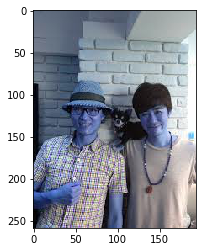

(1080, 1920, 3)


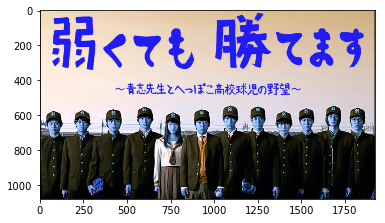

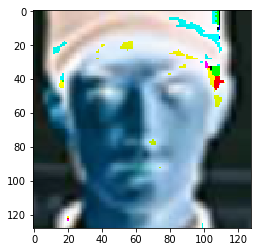

(1, 128, 128, 3)
[[ 0.50326854  0.49673146]]


TypeError: 'TiffImageFile' object is not subscriptable

In [7]:
import os
import cv2
import time
import copy
from matplotlib import pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
import pickle
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

model = load_model('./model/Fuku_model_0.h5')
model.load_weights('./model/Fulu_model_weights_0.h5')

path = os.environ['HOME'] + "/anaconda3/share/OpenCV/haarcascades/" + "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(path) 

dir = os.getcwd() + '/omake'
if not (os.path.exists(dir + "/applied")):
    os.mkdir(dir + "/applied")
img_paths = os.listdir(os.getcwd() + "/omake") 
img_paths = ["/" + img_path  for img_path in img_paths]
print(img_paths)

imsize = 128

for img_path in img_paths:
    root, ext = os.path.splitext(img_path)
    if not ext in ['.jpg', '.jpeg', '.png', '.tiff', '.tif','.bmp', 'JPG', 'JPEG']:
        continue

#    print(img_path)
    img = cv2.imread("omake" + img_path)
    print(img.shape)
    plt.imshow(img)
    plt.show()
#    print(img)

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#    faces = face_cascade.detectMultiScale(gray)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for num in range(len(faces)):
        cropImg = copy.deepcopy(img[faces[num][1]:faces[num][1]+faces[num][3], faces[num][0]:faces[num][0]+faces[num][2]])
        resizeImg = cv2.resize(cropImg, (imsize, imsize))
        
#        x = image.img_to_array(resizeImg)
        plt.imshow(x)
        plt.show()

        t = time.ctime().split(' ')
        if t.count('') == 1:
            t.pop(t.index(''))
        timestr = t[1] + t[2] + t[0] + '_' + t[4] + '_' + t[3].split(':')[0] + t[3].split(':')[1] + t[3].split(':')[2]
        filename = "omake/applied" + '/' + str(timestr) + '.tif'
        cv2.imwrite(filename, resizeImg)

        img = image.load_img(filename, target_size=(128,128))
        x = image.img_to_array(img)

        reshapedImg = x[np.newaxis, :]
        print(reshapedImg.shape)
        y_pred = model.predict(reshapedImg)
        print(y_pred)
        
'''
            t = time.ctime().split(' ')
            if t.count('') == 1:
                t.pop(t.index(''))
            timestr = t[1] + t[2] + t[0] + '_' + t[4] + '_' + t[3].split(':')[0] + t[3].split(':')[1] + t[3].split(':')[2]
            filename = dir + "/" + dst_name + '_' + timestr + "_" + str(num + 1) + '.tif'
            cv2.imwrite(filename, resizeImg)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

        
#cropFace(src_name="福くん", dst_name="Fuku", imsize=128)
#cropFace(src_name="鈴木福", dst_name="Fuku", imsize=128)
#cropFace(src_name="鈴木福さん", dst_name="Fuku", imsize=128)
#cropFace(src_name="fukusuzuki", dst_name="Fuku", imsize=128)
#cropFace(src_name="子役鈴木福君", dst_name="Fuku", imsize=128)
#cropFace(src_name="すずきふくくん", dst_name="Fuku", imsize=128)

#cropFace(src_name="鈴木一真", dst_name="Kazuma", imsize=128)
#cropFace(src_name="すずきかずま", dst_name="Kazuma", imsize=128)
#cropFace(src_name="鈴木一馬ドラマ", dst_name="Kazuma", imsize=128)
#cropFace(src_name="俳優鈴木一真", dst_name="Kazuma", imsize=128)
cropFace(src_name="google", dst_name="Kazuma", imsize=128)
'''

In [1]:
import numpy as np
import os
from keras.preprocessing import image
import pickle

# loadImages
def loadImages(dir:str):
    images = []
    files = []
    for f in os.listdir(dir):
        file = os.path.join(dir, f)
        img = image.load_img(file, target_size=(128,128))
        img_array = image.img_to_array(img)
        images.append(img_array)
        files.append(file)
    return (images, files)

#from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

# input image dimensions
img_rows, img_cols = 128, 128
# input image channels
img_channels = 3

#
script_path = "./" # スクリプトのあるディレクトリへの相対パス
images_Fuku, files_Fuku = loadImages(os.path.join(script_path, 'Fuku_merge'))
images_Kazuma, files_Kazuma = loadImages(os.path.join(script_path, 'Kazuma_merge'))

images_Fuku = np.array(images_Fuku)
images_Kazuma = np.array(images_Kazuma)

print(type(images_Fuku))
print(type(images_Kazuma))

print(images_Fuku.shape)
print(images_Kazuma.shape)

print(len(images_Fuku))

# データサイズを合わせる
while(len(images_Fuku) > len(images_Kazuma)):
    i = np.random.randint(len(images_Fuku))
    images_Fuku = np.delete(images_Fuku, i, 0)
    files_Fuku = np.delete(files_Fuku, i, 0)
# print(images_Fuku.shape)
# print(images_Kazuma.shape)

# データを結合
x = np.vstack((images_Fuku, images_Kazuma))
print(x.shape)

# データを標準化
# sklearnのAPIには多次元配列は入力できないので、
# 一旦ベクトル化して処理した後、reshapeして多次元化する

from sklearn.preprocessing import StandardScaler
x_tmp = x.reshape(x.shape[0]*x.shape[1]*x.shape[2]*x.shape[3])
scaler = StandardScaler()
scaler.fit(x_tmp)

# print(x_scaled.shape)


Using TensorFlow backend.


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(97, 128, 128, 3)
(50, 128, 128, 3)
97
(100, 128, 128, 3)


/home/ujitoko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
import os
import cv2
import time
import copy
from matplotlib import pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
import pickle
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

model = load_model('./model/Fuku_model_0.h5')
model.load_weights('./model/Fulu_model_weights_0.h5')

dir = os.getcwd() + '/Kazuma_merge'
if not (os.path.exists(os.getcwd() + "/testtmp")):
    os.mkdir(os.getcwd() + "/testtmp")
#print(dir)
img_paths = os.listdir(dir)
img_paths = [dir + "/" + img_path  for img_path in img_paths]
#print(img_paths)

imsize = 128

for img_path in img_paths:
    root, ext = os.path.splitext(img_path)
    if not ext in ['.jpg', '.jpeg', '.png', '.tiff', '.tif','.bmp', 'JPG', 'JPEG']:
        continue

    img = image.load_img(img_path, target_size=(128,128))
    x = image.img_to_array(img)
    
    x_tmp = x.reshape(x.shape[0]*x.shape[1]*x.shape[2])
    x_scaled = scaler.transform(x_tmp)
    x_scaled_reshaped = x_scaled.reshape(x.shape)

    reshapedImg = x_scaled_reshaped[np.newaxis, :]
    y_pred_value = model.predict(reshapedImg)
    y_pred = model.predict_classes(reshapedImg)


/home/ujitoko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


1/1 [==============================] - 0s


/home/ujitoko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ujitoko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ujitoko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if

1/1 [==============================] - 0s

/home/ujitoko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ujitoko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ujitoko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if


1/1 [==============================] - 0s


/home/ujitoko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ujitoko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ujitoko/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if

['/444484.png', '/4b61894e401c51f9943a570bd8f036bd4b47a7811473433619.jpg', '/applied', '/images.jpg', '/imgres 2.jpg', '/7e59a099069ce6f87188aced5188f6a2.jpg', '/f5bf444879abe8791c7f13fd98c63b5e.jpg', '/28780_87e8fde4d1b083c21c55b9c5ee5bbe8f.jpg', '/UCNf3kaY.jpg', '/mig.jpg', '/b059b690db005b9077b0fceadb9a149c.jpg', '/v9Raw1a8GHlVx55_EXP4r_389.jpeg', '/20150806182541.jpg', '/imgres.jpg', '/be350c6895930a5aa29163904cd4604f_400.jpg', '/sumi', '/t02200293_0480064010433764486.jpg', '/fc2blog_20130214123033293.jpg']


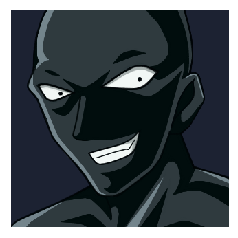

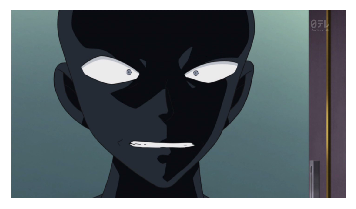

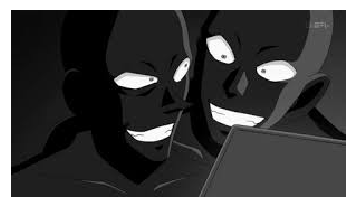

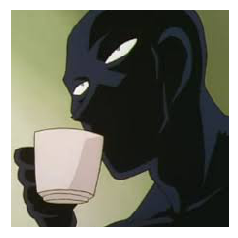

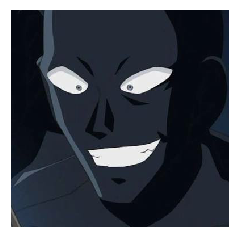

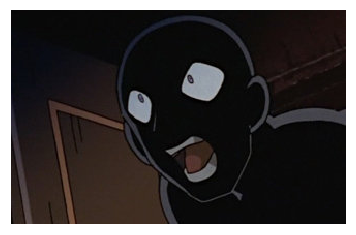

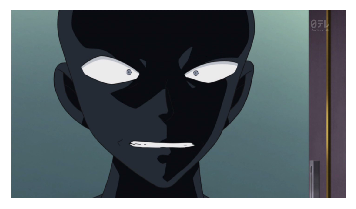

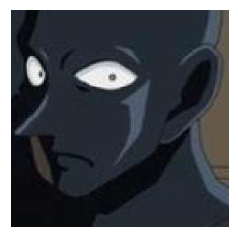

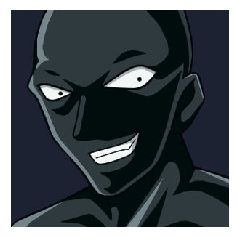

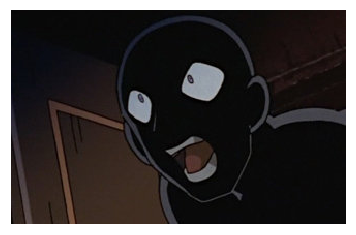

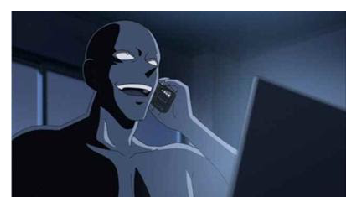

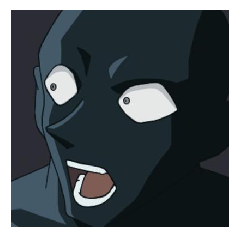

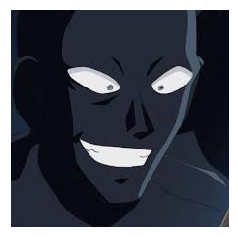

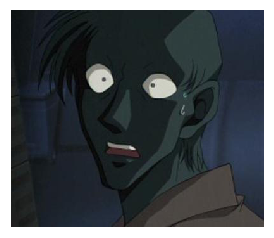

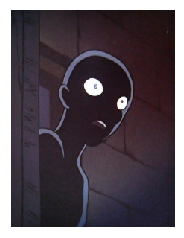

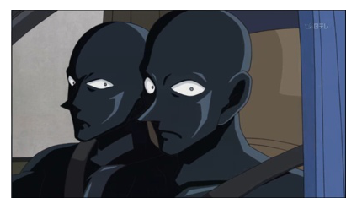

'\n        img = image.load_img(filename, target_size=(128,128))\n        x = image.img_to_array(img)\n\n        reshapedImg = x[np.newaxis, :]\n        print(reshapedImg.shape)\n        y_pred = model.predict(reshapedImg)\n        print(y_pred)\n        \n\n            t = time.ctime().split(\' \')\n            if t.count(\'\') == 1:\n                t.pop(t.index(\'\'))\n            timestr = t[1] + t[2] + t[0] + \'_\' + t[4] + \'_\' + t[3].split(\':\')[0] + t[3].split(\':\')[1] + t[3].split(\':\')[2]\n            filename = dir + "/" + dst_name + \'_\' + timestr + "_" + str(num + 1) + \'.tif\'\n            cv2.imwrite(filename, resizeImg)\n\n        for (x, y, w, h) in faces:\n            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)\n        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))\n        plt.show()\n\n        \n#cropFace(src_name="福くん", dst_name="Fuku", imsize=128)\n#cropFace(src_name="鈴木福", dst_name="Fuku", imsize=128)\n#cropFace(src_name="鈴木福さん", dst_name="Fuku",

In [13]:
import os
import cv2
import time
import copy
from matplotlib import pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
import pickle
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

model = load_model('./model/Fuku_model_0.h5')
model.load_weights('./model/Fulu_model_weights_0.h5')

path = "./lbpcascade_animeface.xml"
#path = os.environ['HOME'] + "/anaconda3/share/OpenCV/haarcascades/" + "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(path) 

dir = os.getcwd() + '/omake'
if not (os.path.exists(dir + "/applied")):
    os.mkdir(dir + "/applied")

img_paths = os.listdir(os.getcwd() + "/omake") 
img_paths = ["/" + img_path  for img_path in img_paths]
print(img_paths)

imsize = 128

for img_path in img_paths:
    root, ext = os.path.splitext(img_path)
    if not ext in ['.jpg', '.jpeg', '.png', '.tiff', '.tif','.bmp', 'JPG', 'JPEG']:
        continue

    img = cv2.imread("omake" + img_path)
#    plt.imshow(img)
#    plt.show()
#    print(img)

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#    faces = face_cascade.detectMultiScale(gray)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    num = 0
    for (x,y,w,h) in (faces):
        cropImg = copy.deepcopy(img[faces[num][1]:faces[num][1]+faces[num][3], faces[num][0]:faces[num][0]+faces[num][2]])
        x_2 = cv2.resize(cropImg, (imsize, imsize))        

        x_tmp = x_2.reshape(x_2.shape[0]*x_2.shape[1]*x_2.shape[2])
        x_scaled = scaler.transform(x_tmp)
        x_scaled_reshaped = x_scaled.reshape(x_2.shape)

        reshapedImg = x_scaled_reshaped[np.newaxis, :]
        y_pred_value = model.predict(reshapedImg)
        y_pred = model.predict_classes(reshapedImg)

        print(y_pred_value)
        print(y_pred)
#        x = image.img_to_array(resizeImg)
#        plt.imshow(x)
#        plt.show()

        if y_pred > 0.5:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), thickness=10)
            cv2.putText(img, "Kazuma", (x, y - int(0.1*h)),  cv2.FONT_HERSHEY_SIMPLEX, 3, (255,0,0), thickness=3)
        else:
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), thickness=10)
            cv2.putText(img, "Fuku", (x, y - int(h*0.1)),  cv2.FONT_HERSHEY_SIMPLEX, 3, (0,255,0), thickness=3)

        num = num+1

    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

'''
        img = image.load_img(filename, target_size=(128,128))
        x = image.img_to_array(img)

        reshapedImg = x[np.newaxis, :]
        print(reshapedImg.shape)
        y_pred = model.predict(reshapedImg)
        print(y_pred)
        

            t = time.ctime().split(' ')
            if t.count('') == 1:
                t.pop(t.index(''))
            timestr = t[1] + t[2] + t[0] + '_' + t[4] + '_' + t[3].split(':')[0] + t[3].split(':')[1] + t[3].split(':')[2]
            filename = dir + "/" + dst_name + '_' + timestr + "_" + str(num + 1) + '.tif'
            cv2.imwrite(filename, resizeImg)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

        
#cropFace(src_name="福くん", dst_name="Fuku", imsize=128)
#cropFace(src_name="鈴木福", dst_name="Fuku", imsize=128)
#cropFace(src_name="鈴木福さん", dst_name="Fuku", imsize=128)
#cropFace(src_name="fukusuzuki", dst_name="Fuku", imsize=128)
#cropFace(src_name="子役鈴木福君", dst_name="Fuku", imsize=128)
#cropFace(src_name="すずきふくくん", dst_name="Fuku", imsize=128)

#cropFace(src_name="鈴木一真", dst_name="Kazuma", imsize=128)
#cropFace(src_name="すずきかずま", dst_name="Kazuma", imsize=128)
#cropFace(src_name="鈴木一馬ドラマ", dst_name="Kazuma", imsize=128)
#cropFace(src_name="俳優鈴木一真", dst_name="Kazuma", imsize=128)
cropFace(src_name="google", dst_name="Kazuma", imsize=128)
'''